## 📝 **Assignment Instructions** 📚  

### 1️⃣ **Data Loading** (🔟 points)  
- ✅ Complete the `load_mnist_data` function  
- 🔄 Properly **normalize** and **transform** the data  

### 2️⃣ **Custom Dropout** (2️⃣0️⃣ points)  
- 🔧 Implement **forward** and **backward** passes  
- 🎯 Match **PyTorch’s** `nn.Dropout` behavior  
- 📏 Ensure **proper scaling** during training  

### 3️⃣ **Custom BatchNorm, CustomRelu, CustomMaxPooling** (3️⃣0️⃣ points)  
- 🔍 Implement **forward pass** with proper normalization  
- 📊 Track **running statistics** accurately  
- 🔄 Handle **both training and evaluation** modes  

### 4️⃣ **CNN Architecture** (2️⃣0️⃣ points)  
- 🛠️ Implement Your Own **Custom VGG16 Model**  
- 🔢 Use appropriate **layer sizes and activations**  
- 📐 Properly handle **input/output dimensions**  

### 5️⃣ **Training Implementation** (2️⃣0️⃣ points)  
- 🚀 Complete **training and evaluation loops**  
- 📈 Implement **logging and visualization**    

---

### ⭐ **Bonus**  
- 📦 **Data Augmentation**  
- 🔄 **Learning Rate Scheduling**  





### 📝 **Report Guidelines: What to Include**

1️⃣ **Introduction** 📖  
   - Briefly introduce the goal of this assignment.  
   - Explain the importance of building custom components (e.g., CustomBatchNorm, CustomReLU, CustomMaxPooling) in deep learning.  
   - Mention that this exercise will help you understand how these components work internally.

---

2️⃣ **Implementation Details** 🛠️  
   For each component, explain:  
   
   - Describe how you implemented `CustomBatchNorm2d`, `CustomReLU`, and `CustomMaxPooling2d`.  
   - Highlight any key challenges and how you overcame them.  
   - Explain the architecture of your VGG16 model.  
   - Describe how you used custom components in the model's convolutional blocks.  
   - Discuss your choice of activation functions, kernel sizes, and layer design.

---

3️⃣ **Training Strategy and Results** 📈  
   - Describe your training strategy (e.g., hyperparameters, optimizer, learning rate schedule).  
   - Present training and testing accuracy/loss curves.  
   - Report the final test accuracy and compare it with the baseline accuracy using PyTorch's built-in components.  
   - Discuss how your custom components affected the model's performance.  

---

4️⃣ **Conclusion and Future Work** 🔮  
   - Summarize your key findings and insights.  
   - Mention any areas where you would like to improve your implementation (e.g., handling edge cases in `CustomMaxPooling`).  

---

### 📤 **Submission Requirements** 📤  
1️⃣ **Notebook** 📒: Complete the notebook with all implementations of `CustomBatchNorm2d`, `CustomReLU`, `CustomMaxPooling2d`, and your custom VGG16 model.  
2️⃣ **Training Visualizations** 📈: Include accuracy and loss curves for both training and validation.  
3️⃣ **Report** 📝: A concise report explaining your implementation choices, challenges faced, and comparisons with PyTorch's built-in components.  
4️⃣ **PDF Submission** 📄:  
   - Convert your report into a **PDF format**.  
   - Ensure that the PDF includes all sections: Introduction, Implementation Details, Training Results and Conclusion.  
   - Include relevant code snippets and result plots in the PDF.

---

### 📎 **How to Submit:**  
- Submit a **single ZIP file** containing:  
  - 📁 **Notebook (`.ipynb`)**  
  - 📄 **Report (`.pdf`)**  
  - 📊 **Training logs and plots (`.png`/`.pdf`)** if applicable.  
- **Filename format:** `Assignment_<YourName_RollNumber>.zip`  



In [1]:
# 🚀 **Importing Helper Modules**

import torch  # 🧠 Core PyTorch library for tensor operations and neural networks
import torch.nn as nn  # 🏗️ Neural network components (layers, loss functions)
import torch.optim as optim  # ⚙️ Optimization algorithms (SGD, Adam, etc.)
import torchvision  # 🎨 Computer vision utilities and datasets
import torchvision.transforms as transforms  # 🖼️ Data transformations (normalization, augmentation)
from torch.utils.data import DataLoader  # 🚚 For loading and batching data
import matplotlib.pyplot as plt  # 📊 Visualization for losses and accuracies

## 🔢 **MNIST Dataset: The Classic Benchmark** 🖋️✨  

**MNIST** is a popular dataset of **70,000 handwritten digits** (0-9) 📝, widely used for training and testing image processing systems.  

### 📊 **Dataset Overview**  
- 🖼️ **60,000 Training Images**  
- 🖼️ **10,000 Test Images**  
- 🔲 **Image Size:** 28x28 pixels (grayscale)  
- 🔍 **Digits:** Size-normalized and centered  

### 🌐 **Want to Learn More?**  
Check out the full details here: [📖 Wikipedia - MNIST Database](https://en.wikipedia.org/wiki/MNIST_database)  


In [2]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

import torchvision
import torchvision.transforms as transforms
root_dir = './data'
torchvision.datasets.MNIST(root=root_dir,download=True)

--2025-02-28 08:39:54--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2025-02-28 08:39:55--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [         <=>        ]  33.20M  6.77MB/s    in 6.1s    

2025-02-28 08:40:02 (5.47 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.73MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 152kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.43MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 12.5MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import random

def load_mnist_data(batch_size=64, sample_percent=1):
    """
    📦 **Load and preprocess the MNIST dataset.**
    📜 **Returns:** train_loader and test_loader 🎯
    """
    transform = transforms.Compose([
        transforms.ToTensor(),  # 🔄 Convert images to tensors 📊
        transforms.Normalize((0.1307,), (0.3081,))  # ⚖️ Normalize with mean and std for MNIST dataset
    ])

    # 🛠️ **TODO: Load MNIST training and test datasets** 🖼️
    # 📌 Hint: Use `torchvision.datasets.MNIST` for dataset loading 📥
    #          Use `torch.utils.data.DataLoader` for creating data loaders 🔄

    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)


    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(sample_percent * num_train)
    random.shuffle(indices)

    train_indices = indices[:split]
    train_subset = Subset(train_dataset, train_indices)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader  # 🚚 Return the loaders 📦


## 🎯 **Understanding Dropout in Deep Learning** 🚀  

**Dropout** is a regularization technique 🛡️ used to prevent **overfitting** in deep neural networks by randomly ignoring or **"dropping out"** some layer outputs during training.  

### 🔍 **Where is Dropout Applied?**  
Dropout can be implemented in different types of layers:  
- 💡 **Dense (Fully Connected) Layers**  
- 🌀 **Convolutional Layers**  
- 🔁 **Recurrent Layers**  
> 🚫 It is **NOT applied** to the output layer!  

### 🎲 **How Dropout Works**  
The **dropout probability** 🔢 determines how likely it is for a neuron to be dropped out:  
- 🔹 **Input Layer:** Lower dropout probability  
- 🔹 **Hidden Layers:** Higher dropout probability  

By doing so, we ensure that no single neuron becomes **too specialized** or overly dependent on specific features in the training data. This helps the network generalize better to new, unseen data. 🎯✨  


In [4]:
# 🚀 **Part 2: Custom Dropout Implementation**

class CustomDropout(nn.Module):
    """
    🛠️ TODO: Implement custom dropout layer 🎯

    📜 **Requirements:**
    1️⃣ Initialize with **dropout probability** `p` 🎲
    2️⃣ Implement **forward pass** with proper scaling 🔄
    3️⃣ **Only drop** units during **training** (`self.training` flag) 🏋️‍♂️
    """

    def __init__(self, p=0.5,is_input_layer=False):
        super(CustomDropout, self).__init__()
        # 🎲 Store dropout probability (p between 0 and 1)
        self.p = p*0.4 if is_input_layer else p
        self.is_input_layer = is_input_layer  # 🚧 Initialization complete! Time to implement the logic 🛠️

    def forward(self, x):
        # 🔄 **TODO: Implement forward pass**
        if self.training: # 🏋️‍♂️ Drop units only during training mode
            mask=torch.bernoulli(torch.ones_like(x)*(1-self.p))  # 🚧 Work in progress! Apply dropout logic 🧪
            return x*mask/(1-self.p)
        return x  # 🔄 Return the (possibly dropped) output ✨


## 🔄 **What is BatchNorm2d?** 🧪  

**BatchNorm2d** (Batch Normalization for 2D inputs) is a layer used in deep learning to **normalize** the inputs across a batch during training. It helps your neural network train faster and generalize better! 🚀  

### 🌟 **Why Use BatchNorm2d?**  
- ⚖️ **Normalizes activations** to reduce internal covariate shift  
- 🚀 **Accelerates training**  
- 🛡️ **Acts as a regularizer**, reducing the need for dropout  

---

### 🏗️ **How It Works:**  
1️⃣ **Compute the Mean & Variance** 📊 for each feature map across the batch  
2️⃣ **Normalize the activations**: Subtract the mean and divide by the standard deviation ⚙️  
3️⃣ **Learnable Parameters** 📈: Scale (γ) and Shift (β) to allow flexibility  
   \- **γ (Gamma)** controls the scale 📏  
   \- **β (Beta)** controls the shift ↕️  

---

### 🖼️ **Where is BatchNorm2d Used?**  
- 📦 **Convolutional Neural Networks (CNNs)** after convolution layers  
- 🛠️ Helps stabilize training and improve accuracy 🎯  


In [5]:
# 🚀 **Part 3: Custom BatchNorm2d Implementation**

class CustomBatchNorm2d(nn.Module):
    """
    🛠️ TODO: Implement custom 2D batch normalization 🔄

    📜 **Requirements:**
    1️⃣ Initialize **running mean**, **variance**, **gamma (scale)**, and **beta (shift)** ⚖️
    2️⃣ Implement **forward pass** with proper normalization ✨
    3️⃣ Track **running statistics** during training 📊
    """

    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(CustomBatchNorm2d, self).__init__()
        # 🛠️ **TODO: Initialize parameters and buffers**
        self.num_features=num_features  # 🚧 Work in progress 🚀
        self.eps=eps
        self.momentum=momentum
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))
        

    def forward(self, x):
        # 🔄 **TODO: Implement forward pass for batch normalization**
        # Steps:
        if self.training:
            # 1️⃣ Calculate batch mean and variance 📊
            batch_mean = x.mean(dim=(0, 2, 3), keepdim=True)
            batch_var = x.var(dim=(0, 2, 3), keepdim=True,unbiased=False)
            # 4️⃣ Update running statistics during training 🏋️‍♂️
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean.squeeze()
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var.squeeze()
        else:
            batch_mean = self.running_mean.view(1, self.num_features, 1, 1)
            batch_var = self.running_var.view(1, self.num_features, 1, 1)
        # 2️⃣ Normalize the input 🎯
        out=(x-batch_mean)/torch.sqrt(batch_var+self.eps)
        out*=self.gamma.view(1,self.num_features,1,1)
        out+=self.beta.view(1,self.num_features,1,1)
        return out # 🚧 Normalize and return the output 🧪


## ⚡ **What are Activation Functions?** 🔑  

**Activation functions** introduce **non-linearity** into neural networks, allowing them to learn and solve **complex tasks**. Without them, the network would only be able to learn **linear relationships** (which isn’t very useful for most problems 😅).  

---

### 🌟 **Why are Activation Functions Important?**  
- 🔄 **Adds non-linearity** to the model  
- 🚀 **Enables learning of complex patterns**  
- 🛠️ Helps the network make decisions, just like neurons in the brain 🧠  

---

### 📚 **Common Activation Functions**  

#### 1️⃣ **ReLU (Rectified Linear Unit)** ⚡  
- **Formula:** `f(x) = max(0, x)`  
- **Use:** Most common in hidden layers of CNNs and DNNs  
- **Pros:** Simple, fast, reduces vanishing gradient problem  
- **Cons:** Can suffer from the **dying ReLU** problem 😵  

---

#### 2️⃣ **Sigmoid (Logistic Function)** 📈  
- **Formula:** `f(x) = 1 / (1 + exp(-x))`  
- **Range:** (0, 1)  
- **Use:** Good for binary classification tasks 🔢  
- **Cons:** Can cause **vanishing gradients** 😬  

---

#### 3️⃣ **Tanh (Hyperbolic Tangent)** 🔄  
- **Formula:** `f(x) = (2 / (1 + exp(-2x))) - 1`  
- **Range:** (-1, 1)  
- **Use:** Often used in recurrent networks 🔁  
- **Pros:** Centered around 0, making optimization easier  
- **Cons:** Also prone to vanishing gradients  

---

#### 4️⃣ **Softmax** 🎯  
- **Formula:** Converts logits into probabilities 🔢  
- **Range:** (0, 1), sums to 1  
- **Use:** Last layer for multi-class classification problems  

---

### 🎯 **How to Choose an Activation Function?**  
- For **hidden layers**, use **ReLU** or its variants (like Leaky ReLU or ELU)  
- For **binary classification**, use **Sigmoid**  
- For **multi-class classification**, use **Softmax**  


In [6]:
class CustomReLU(nn.Module):
    """
    🛠️ TODO: Implement custom ReLU activation function ✨

    📜 **Requirements:**
    1️⃣ Apply ReLU manually using tensor operations (avoid using `F.relu`) 🔄
    2️⃣ Output should replace all negative values with 0 (ReLU behavior) 🧹
    """

    def forward(self, x):
        # 🔄 **TODO: Implement forward pass for ReLU**
        # Hint: Use `torch.max` to replace all negative values with 0 🎯
        return torch.max(x, torch.zeros_like(x))
        # 🚧 Replace and return the ReLU-activated output ⚡


In [7]:
class CustomMaxPooling2d(nn.Module):
    """
    🛠️ TODO: Implement custom 2D MaxPooling layer 🏊

    📜 **Requirements:**
    1️⃣ Implement a max-pooling operation with a given kernel size and stride 📐
    2️⃣ Return the maximum value in each pooling window 🌊
    3️⃣ Ensure it supports both training and evaluation modes 🔄
    """

    def __init__(self, kernel_size=2, stride=2):
        super(CustomMaxPooling2d, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        batch_size, channels, height, width = x.size()
        x_unfolded = x.unfold(2, self.kernel_size, self.stride).unfold(3, self.kernel_size, self.stride)

        # Reshape to combine batch and channel dimensions
        x_unfolded = x_unfolded.contiguous().view(x.size(0), x.size(1), -1, self.kernel_size * self.kernel_size)
        
        # Compute max for each window
        x_pooled, _ = x_unfolded.max(dim=-1)
        x_pooled=x_pooled.view(batch_size,channels,height // self.stride,width//self.stride)
        
        
        return x_pooled


### 🔍 **Hint for MaxPooling with `unfold`**  
`torch.nn.functional.unfold` is a powerful tool that helps break an input tensor into sliding windows. Here's how you can use it to implement max pooling:  

1️⃣ **Unfold the input tensor:** This will give you a collection of overlapping windows based on the `kernel_size` and `stride`.  
```python
# Unfold the input tensor into sliding windows
x_unfolded = x.unfold(2, self.kernel_size, self.stride).unfold(3, self.kernel_size, self.stride)
```

2️⃣ **Reshape the unfolded tensor:** Convert it to a shape that makes it easier to compute the maximum.  
```python
x_unfolded = x_unfolded.contiguous().view(x.size(0), x.size(1), -1, self.kernel_size * self.kernel_size)
```

3️⃣ **Compute the max along the last dimension:** This dimension represents all elements within each window.  
```python
x_pooled, _ = x_unfolded.max(dim=-1)
```

4️⃣ **Reshape back to the correct output size:** This ensures that the output matches what you would expect from a typical max pooling layer.  


## 📜 **Implement Your Own Custom VGG16 Model**

1️⃣ Implement both CustomReLU and CustomMaxPooling2d in the provided classes.

2️⃣ Use only tensor operations like torch.max or unfold (no built-in F.relu or nn.MaxPool2d).

3️⃣ Integrate them into your CustomVGG16 model.

### 🌐 **Want to Learn More?**  
Check out the full details here: [📖 VGG16 Paper](https://arxiv.org/pdf/1409.1556)  


In [8]:
class CustomVGG16(nn.Module):
    """
    📜 Custom VGG16-like Model with:
    1️⃣ Convolutional blocks using nn.Conv2d, CustomBatchNorm2d, and CustomDropout 🔄
    2️⃣ ReLU activation ⚡ and MaxPooling 🏊
    3️⃣ Fully connected layers at the end
    """

    def __init__(self, num_classes=10):  # num_classes = 10 for MNIST
        super(CustomVGG16, self).__init__()
        
        # Convolutional layers
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            CustomBatchNorm2d(64),
            CustomReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            CustomBatchNorm2d(64),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),
            
            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            CustomBatchNorm2d(128),
            CustomReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            CustomBatchNorm2d(128),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2),
            
            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            CustomBatchNorm2d(256),
            CustomReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            CustomBatchNorm2d(256),
            CustomReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            CustomBatchNorm2d(256),
            CustomReLU(),
            CustomMaxPooling2d(kernel_size=2, stride=2)
        )
        
        # Fully connected layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            CustomDropout(p=0.5,is_input_layer=True),
            nn.Linear(256 * 3 * 3, 4096),
            CustomReLU(),
            CustomDropout(p=0.5),
            nn.Linear(4096, 4096),
            CustomReLU(),
            CustomDropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [9]:
import torch

def train_epoch(model, train_loader, criterion, optimizer, device):
    """
    🛠️ Implements training loop for one epoch 🏋️‍♂️
    """
    model.train()  # 📈 Switch to training mode
    running_loss = 0.0  # 💰 Track the cumulative loss
    correct = 0  # ✅ Correct predictions counter
    total = 0  # 📊 Total samples counter

    for batch_idx, (data, target) in enumerate(train_loader):  # 🔄 Loop through batches
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()  # Reset gradients
        
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Calculate loss
        
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
        
        _, predicted = output.max(1)  # Get the index of the max log-probability
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    # 📊 Return average loss and accuracy for the epoch
    return running_loss / len(train_loader), 100. * correct / total

def evaluate(model, test_loader, criterion, device):
    """
    🧪 Implements evaluation loop 🔍
    """
    model.eval()  # 🔕 Switch to evaluation mode (no gradients)
    test_loss = 0  # 💰 Track cumulative test loss
    correct = 0  # ✅ Correct predictions counter
    total = 0  # 📊 Total samples counter

    with torch.no_grad():  # 🚫 No gradient calculation for evaluation
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            
            output = model(data)  # Forward pass
            test_loss += criterion(output, target).item()  # Sum up batch loss
            
            _, predicted = output.max(1)  # Get the index of the max log-probability
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    # 📊 Return average test loss and accuracy
    return test_loss / len(test_loader), 100. * correct / total


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


🌟 Epoch 1/10
Epoch 1/10, Train Loss: 0.2305, Train Acc: 93.20%, Test Loss: 0.0544, Test Acc: 98.55%
🌟 Epoch 2/10
Epoch 2/10, Train Loss: 0.0792, Train Acc: 97.95%, Test Loss: 0.0359, Test Acc: 98.97%
🌟 Epoch 3/10
Epoch 3/10, Train Loss: 0.0593, Train Acc: 98.47%, Test Loss: 0.0429, Test Acc: 98.93%
🌟 Epoch 4/10
Epoch 4/10, Train Loss: 0.0546, Train Acc: 98.65%, Test Loss: 0.0328, Test Acc: 99.12%
🌟 Epoch 5/10
Epoch 5/10, Train Loss: 0.0415, Train Acc: 98.90%, Test Loss: 0.0324, Test Acc: 99.23%
🌟 Epoch 6/10
Epoch 6/10, Train Loss: 0.0406, Train Acc: 98.94%, Test Loss: 0.0311, Test Acc: 99.28%
🌟 Epoch 7/10
Epoch 7/10, Train Loss: 0.0330, Train Acc: 99.17%, Test Loss: 0.0274, Test Acc: 99.33%
🌟 Epoch 8/10
Epoch 8/10, Train Loss: 0.0308, Train Acc: 99.27%, Test Loss: 0.0298, Test Acc: 99.28%
🌟 Epoch 9/10
Epoch 9/10, Train Loss: 0.0306, Train Acc: 99.25%, Test Loss: 0.0378, Test Acc: 99.02%
🌟 Epoch 10/10
Epoch 10/10, Train Loss: 0.0272, Train Acc: 99.34%, Test Loss: 0.0283, Test Acc: 99.30

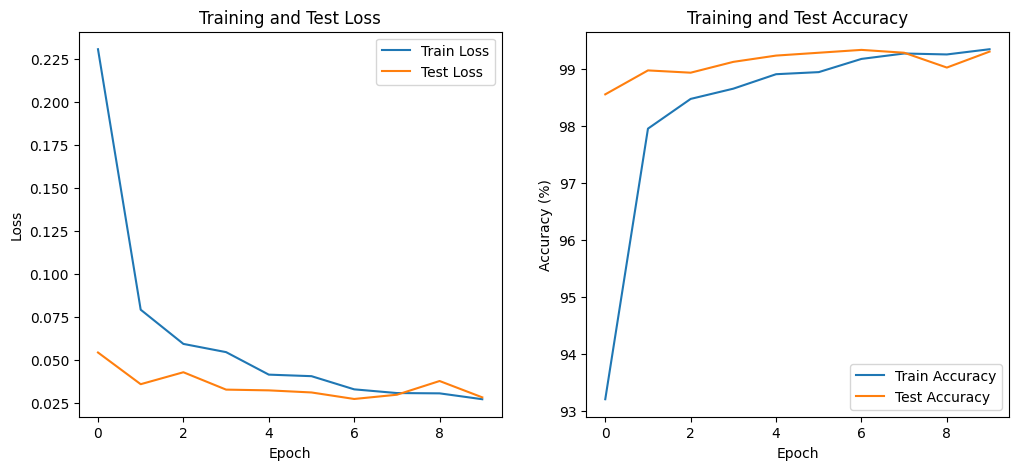

In [10]:
import torch.optim.lr_scheduler as lr_scheduler

def main():
    # ⚙️ **Hyperparameters**
    BATCH_SIZE = 64  # 📦 Batch size for data loading
    EPOCHS = 10  # 🔄 Number of training epochs
    LEARNING_RATE = 0.001  # 🚀 Learning rate for optimizer
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # ⚡ Use GPU if available

    # 📊 **Load data**
    train_loader, test_loader = load_mnist_data(BATCH_SIZE)

    # 🛠️ **Initialize model, criterion, optimizer**
    model = CustomVGG16().to(DEVICE)  # 🖥️ Move model to the selected device
    criterion = nn.CrossEntropyLoss()  # 🎯 Loss function for classification
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  # 🚀 Adam optimizer for better convergence
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

    # 🔄 **Training loop**
    train_losses = []  # 📉 Track training losses
    test_losses = []  # 📉 Track test losses
    train_accs = []  # 📊 Track training accuracy
    test_accs = []  # 📊 Track test accuracy

    for epoch in range(EPOCHS):
        # 🏋️♂️ **TODO: Implement main training loop**
        print(f"🌟 Epoch {epoch+1}/{EPOCHS}")  # 🕒 Display current epoch
        # Example Steps:
        # 1️⃣ Train for one epoch
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, DEVICE)
       
        # 2️⃣ Evaluate on test set
        test_loss, test_acc = evaluate(model, test_loader, criterion, DEVICE)
        scheduler.step(test_loss)
        # 3️⃣ Record losses and accuracies
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # 4️⃣ Print progress 💬
        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

    # 📈 **Plot results**
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.show()  # 🎨 Generate and display plots 📊

if __name__ == "__main__":
    main()